### Import Required Libraries

In [2]:
!pip install scikit-image

   ---------------------------------------- 0.0/12.9 MB ? eta -:--:--
   - -------------------------------------- 0.5/12.9 MB 4.5 MB/s eta 0:00:03
   -------- ------------------------------- 2.6/12.9 MB 9.0 MB/s eta 0:00:02
   ------------- -------------------------- 4.2/12.9 MB 9.8 MB/s eta 0:00:01
   ----------------- ---------------------- 5.8/12.9 MB 8.4 MB/s eta 0:00:01
   --------------------- ------------------ 6.8/12.9 MB 7.5 MB/s eta 0:00:01
   ----------------------- ---------------- 7.6/12.9 MB 7.0 MB/s eta 0:00:01
   ------------------------- -------------- 8.1/12.9 MB 6.3 MB/s eta 0:00:01
   -------------------------- ------------- 8.4/12.9 MB 5.9 MB/s eta 0:00:01
   --------------------------- ------------ 8.9/12.9 MB 5.2 MB/s eta 0:00:01
   ----------------------------- ---------- 9.4/12.9 MB 4.8 MB/s eta 0:00:01
   ------------------------------ --------- 9.7/12.9 MB 4.7 MB/s eta 0:00:01
   ------------------------------- -------- 10.2/12.9 MB 4.4 MB/s eta 0:00:01
   --


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from skimage import data
from skimage.transform import resize

### Load and Resize a Sample Image

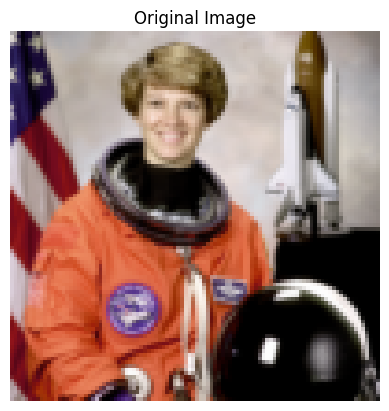

In [4]:
image = data.astronaut()  # sample image from skimage
image = resize(image, (100, 100), anti_aliasing=True)
plt.imshow(image)
plt.title("Original Image")
plt.axis("off")
plt.show()

### Flatten the Image

In [5]:
pixels = image.reshape(-1, 3)  # shape: (100*100, 3)
print("Original Shape:", pixels.shape)

Original Shape: (10000, 3)


### Apply PCA for Dimensionality Reduction

In [18]:
pca = PCA(n_components=2)
pixels_pca = pca.fit_transform(pixels)
print("After PCA Shape:", pixels_pca.shape)

After PCA Shape: (10000, 2)


### Apply K-Means Clustering

In [19]:
kmeans = KMeans(n_clusters=8, random_state=42)
clusters = kmeans.fit_predict(pixels_pca)

### Reconstruct Compressed Image

In [20]:
# Replace each pixel by its cluster center
compressed_pixels = kmeans.cluster_centers_[clusters]
# Inverse transform PCA to original color space
compressed_pixels = pca.inverse_transform(compressed_pixels)
compressed_image = compressed_pixels.reshape(100, 100, 3)

###  Visualize the Compressed Image

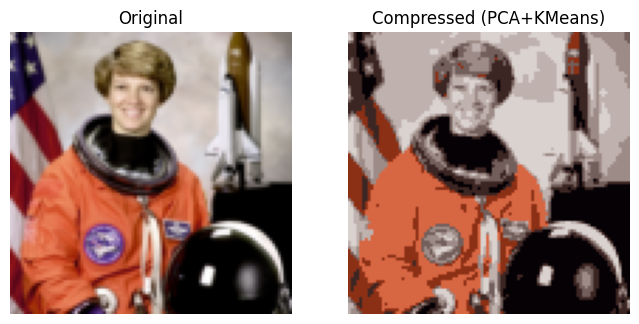

In [21]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.imshow(image)
plt.title("Original")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(np.clip(compressed_image, 0, 1))
plt.title("Compressed (PCA+KMeans)")
plt.axis("off")

plt.show()